In [1]:

import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

**Start at:** Saturday 18 November 2023, 22:06:31  
**Hostname:** Dulce-ASUS-mint (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/PytChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

ModuleNotFoundError: No module named 'tools4pyPhysChem'

# <!-- TITLE --> MOLECULAR DYNAMICS - VELOCITY VERLET ALGORITHM

## Introduction

<div class="intro">

This computer lab deal with Classical molecular dynamics. In the context of theoretical chemistry, classical molecular dynamic is a computational method that allows study the motion of atoms or molecule under the influence of a specific potential. The principle of molecular dynamic is to solve Newton’s equations of motions in order to simulate the dynamical behaviour of nuclei.
    
The principle of classical molecular dynamics is to solve Newton's equations to model the dynamic behavior of nuclei. In order to calculate the positions of atoms at a given time, it is necessary to use a "propagator". Of the many propagators available, the "Velocity-Verlet" type is among the most widely used. In this case, positions and velocities are propagated over time according to the following equations.
\begin{align}    
\mathbf{x(t+\delta t)=x(t)+v_x(t).\delta t+\frac{1}{2} \gamma(t).\delta t^2} \\    
\end{align}
    
\begin{align}   
\mathbf{v_x(t+\delta t)=v_x(t)+\frac{\gamma(t)+\gamma(t+δt)}{2}.\delta t} \\
\end{align}
    
whith $v(t)$, the velocity (first derivatives of positions with respect to time) and $\gamma (t)$, the acceleration (second derivatives of positions with respect to time).
    
To determine accelerations, we use Newton's law, which relates acceleration to force and thus to the energy gradient.
    
\begin{align}
\vec{\gamma}(t) & = \frac{\vec{F}(t)}{M} \\
\end{align}
    
    
\begin{align}
\vec{F}(t)&=-\vec{\nabla}_x{\mathbf{V(x(t))}}&= -\frac{\partial V(x(t))}{\partial x} \\
\end{align}
    
Initial conditions ($x(t=0)$ and $v(t=0)$) and a potential function are therefore required to achieve dynamics. The propagation of positions and velocities is iterative. By rewriting the "velocity verlet" equations considering t=0, the positions and velocities calculated for δt will become the positions and velocities at t=0 for the next point and so on....
For this project, we'll consider a particle of mass 1 moving on a one-dimensional model potential (the generalisation to two- or more-dimension is straitforward)

</div>



## Definition of the differents potentials

<div class="rqT" title="Directives">
    
- It is necessary to define model potentials before performing MD simulations
- These potentials and the associated forces must be defined using symbolic algebra and may need the SymPy module
</div>


<u>One-dimensional model potentials considered</u>:
    
    
**Harmonic potential**: $$ V(x)=k.(x-x_e)^2 $$


**Morse Potential**: $$V(x)=D_e.(1-e^{-\alpha(x-x_e)})^2$$


**Double_well potential**: $$ V(x)=\frac{1}{2}(f_1(x)+f_2(x))-\frac{1}{2}\sqrt{(f_1(x)-f_2(x))^2+h^2} $$

with $$ f_i(x)=k_i.(x-x_{ei})^2 + V_i $$

    



In [2]:
import sympy as sp
import math
import numpy as np
import matplotlib.pyplot as plt

<div class="rqT" title="Directives">
    
- Each potential can be characterized by several parameters, which need to be defined beforehand. 
</div>

In [3]:
#Define parameters for potentials:
m = 1       # mass of the particle
xe_1 = 0    # Equilibrium distance for harmonic, Morse and double well potentials
xe_2 = -2   # Equilibrium distance for double well potential only

k_1 =  2    # Force constant for harmonic and double well potentials
k_2 =  2    # Force constant for double well potential only

alpha = 0.05     # Parameter for Morse potentia
De = 2           # Prefactor for Morse potential

V_1 =  0      # Translation of potential (1) for double well potential
V_2 =  0      # Translation of potential (2) for double well potential

h = 2         # Coupling term for double well potential

<div class="exE">

- To simplify the switch between potentials, define three differents function as a function of x, one for each potential
- <b/>Forces</b> are a point of utmost importance of the algorithm. Define a function to calculate forces for a selected potential
- Display the analytic expression of the selected potential and associated forces
- Plot the selected potential as a function of the variable 'x' (You may need to use the lambdify function in the SymPy module to calculate a numerical value). 
    
</div>

<div class="rq">

Before going further, let's get rid of the "*last-operation-show-up*" behavior with Jupyter notebooks.

</div>

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Harmonic Potential:


2*x**2

Associated forces:


-4*x

Morse Potential:


2*(1 - exp(-0.05*x))**2

Associated forces:


-0.2*(1 - exp(-0.05*x))*exp(-0.05*x)

Double-well Potential:


1.0*x**2 + 1.0*(x + 2)**2 - 0.5*sqrt((2*x**2 - 2*(x + 2)**2)**2 + 4)

Associated forces:


-4.0*x + 0.5*(-16*x**2 + 16*(x + 2)**2)/sqrt((2*x**2 - 2*(x + 2)**2)**2 + 4) - 4.0

Text(0.5, 1.0, 'Harmonic Potential vs Position')

(-5.0, 5.0)

(0.0, 10.0)

Text(0.5, 0, 'Position $x$')

Text(0, 0.5, 'Potential Energy')

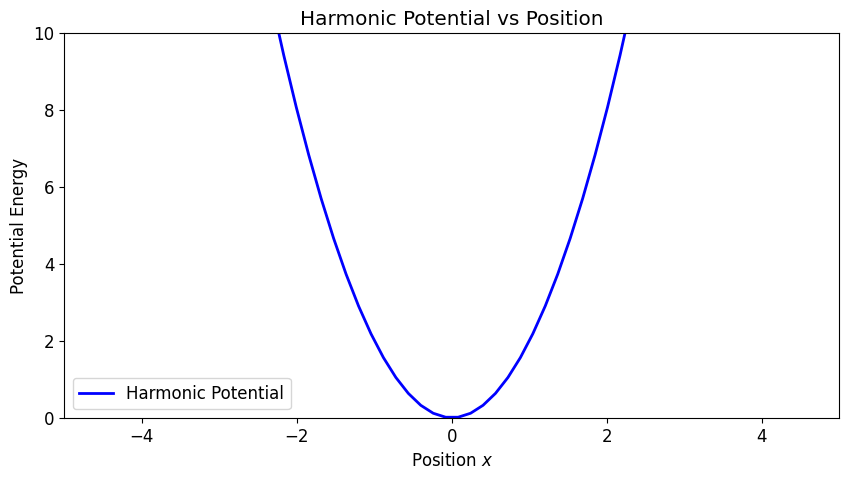

Text(0.5, 1.0, 'Morse Potential vs Position')

(-50.0, 100.0)

(0.0, 10.0)

Text(0.5, 0, 'Position $x$')

Text(0, 0.5, 'Potential Energy')

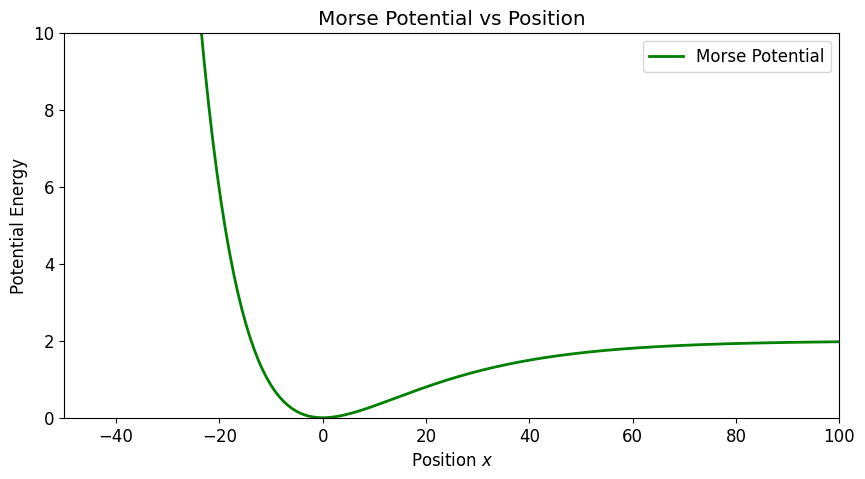

Text(0.5, 1.0, 'Double-well Potential vs Position')

(-10.0, 10.0)

(-0.1, 10.0)

Text(0.5, 0, 'Position $x$')

Text(0, 0.5, 'Potential Energy')

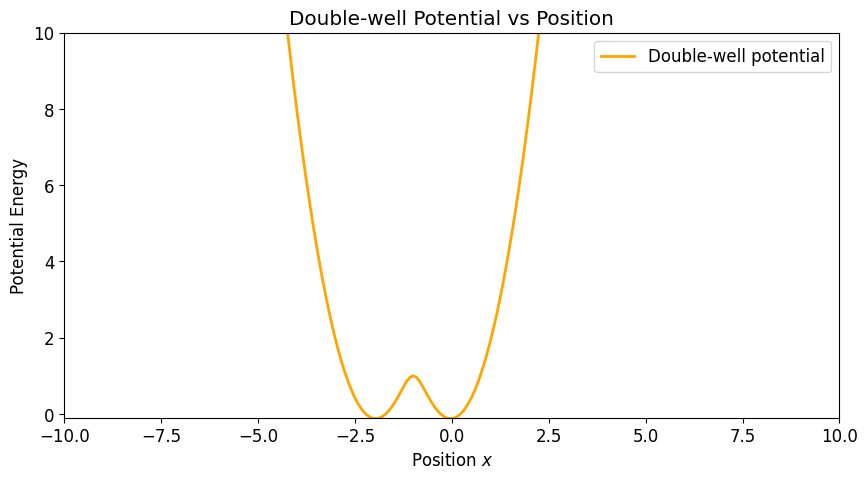

Text(0.5, 1.0, 'Potential vs Position')

(-20.0, 25.0)

(-0.5, 5.0)

Text(0.5, 0, 'Position $x$')

Text(0, 0.5, 'Potential Energy')

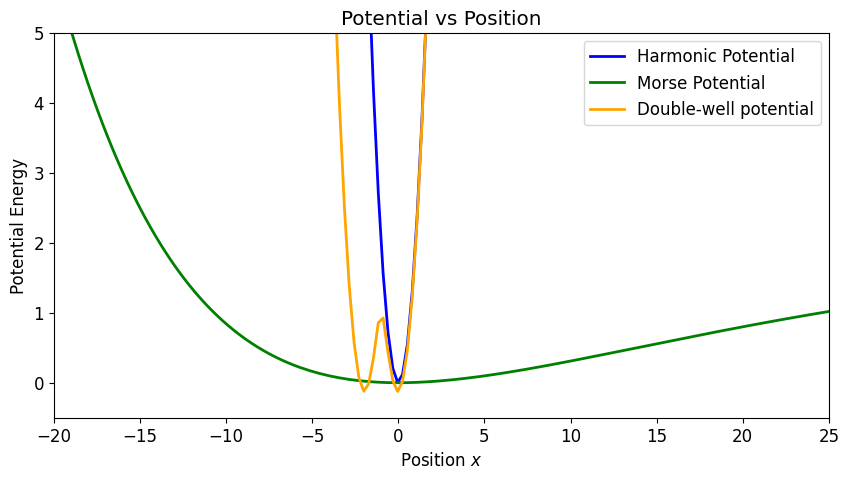

In [5]:
# insert your code here

#FIRST PART
x = sp.symbols('x')   #Define x symbol in SymPy

#1. Harmonic Potential
def V_harm(x):
    V_harm = k_1*(x-xe_1)**2   #Applying the equation k*(x-x_e)^2 with k_1 and xe_1
    return V_harm

#2. Morse Potential
def V_morse(x):
    V_morse = De*(1-sp.exp(-alpha*(x-xe_1)))**2  #Applying eq. De*(1-e^{-alpha*(x-x_e)})
    return V_morse

#3. Double-well Potential
def V_dw(x):
    #First define f1 and f2 using fi(x) = ki*(x-xe_i)^2 + Vi
    f1 = k_1*(x-xe_1)**2 + V_1
    f2 = k_2*(x-xe_2)**2 + V_2
    #Then apply V(x) = 1/2*(f1+f2)^2 -1/2*\sqrt((f1(x)-f2(x))^2 + h^2)
    V_dw = 1/2*(f1 + f2) - 1/2*sp.sqrt((f1-f2)**2 + h**2)
    return V_dw

#SECOND PART. Calculate the force for a selected potential: - First derivative of V(x) with respect to x. 
#We use SymPy to calculate the derivative.

def force_pot(V):
    der_pot = sp.diff(V, x)    #derivative of potential V with respect to x
    return -der_pot

#THIRD PART. Display the analytic expression of the selected potential and associated forces

potential = [V_harm(x), V_morse(x), V_dw(x)]  #Analytical expression of each potential stored in a list
name = ["Harmonic", "Morse", "Double-well"]   #Names stored in a list for easier printing later

for i in range(0,len(potential)):    #Loop to iterate one time for each potential (thus: len(potential))
    print("\033[1m" + f"{name[i]} Potential:" +"\033[0m")   #Print the name of the potential for each iteration
    potential[i]                                            #Call the potential from the list
    print("\033[1m" + "Associated forces:" +"\033[0m")      
    force_pot(potential[i])                                 #Evaluate the function to calculate force on the given potential


#FOURTH PART. Plot the selected potential as a function of the variable 'x' 

#In the previous step, the values of the 3 potentials were stored in the list "potential". 
#Now, each is retrieved to be lambdified and then plotted.
V_harm_ = potential[0]
V_morse_ = potential[1]
V_dw_ = potential[2]

#Lambdifying
_V_harm_ = sp.lambdify([x],V_harm_)
_V_morse_ = sp.lambdify([x],V_morse_)
_V_dw_ = sp.lambdify([x],V_dw_)


#Plotting Harmonic Potential
_x = np.linspace(-20.,20.,250)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_x, _V_harm_(_x),linewidth=2,color='blue',label="Harmonic Potential")
plt.title("Harmonic Potential vs Position")
#limits for x and y axes
plt.xlim(-5,5)                                   
plt.ylim(0,10)
plt.xlabel("Position $x$")
plt.ylabel("Potential Energy")
plt.legend()
plt.show()

#Plotting Morse Potential
_x = np.linspace(-100.,100.,250)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_x, _V_morse_(_x),linewidth=2,color='green',label="Morse Potential")
plt.title("Morse Potential vs Position")
plt.xlim(-50,100)                                   
plt.ylim(0,10)
plt.xlabel("Position $x$")
plt.ylabel("Potential Energy")
plt.legend()
plt.show()

#Plotting Double-well Potential.
_x = np.linspace(-10.,10.,250)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_x, _V_dw_(_x),linewidth=2,color='orange',label="Double-well potential")
plt.title("Double-well Potential vs Position")
#limits for x and y axes
plt.xlim(-10,10)                                  
plt.ylim(-0.1,10)
plt.xlabel("Position $x$")
plt.ylabel("Potential Energy")
plt.legend()
plt.show()

#All together
_x = np.linspace(-20.,50.,250)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_x, _V_harm_(_x),linewidth=2,color='blue',label="Harmonic Potential")
plt.plot(_x, _V_morse_(_x),linewidth=2,color='green',label="Morse Potential")
plt.plot(_x, _V_dw_(_x),linewidth=2,color='orange',label="Double-well potential")
plt.title("Potential vs Position")
#limits for x and y axes
plt.xlim(-20,25)                                   
plt.ylim(-0.5,5)
plt.xlabel("Position $x$")
plt.ylabel("Potential Energy")
plt.legend()
plt.show()



## Velocity Verlet Algorithm

<div class="rqT" title="Directives">
    
- Several parameters must be defined to control the MD simulation:
    - step time <b/> δt</b>     
    - Total time or number of steps 
    - The initial position and initial velocity
- <b/>Total energy</b>, defined in the context of Hamiltonian mechanics, is a constant. It must be calculated for each time step in order to check that the algorithm behaves correctly. 
- You will need to use the lambdify function in the SymPy module to calculate a numerical force value for each position.  

</div>

<div class="exE">

- Define the variables that describe the parameters of the MD simulation (initial time will be set to 0)
- Use a loop to implement the velocity verlet algorithm
    - Defining functions for updating positions and speeds can be useful but is not mandatory
- For each step (including the initial step), record in separate tables (or in a single file)
    - Time
    - Position
    - Velocity
    - Energy (i.e value of the potential)
    - Total energy
    
    
</div>

In [6]:
# insert your code here

#FIRST: Defining the variables that describe the parameters of the MD simulation
dt = 0.001 #Step time in seconds
tf = 10 #Number of steps to get 1 s of simulation
M = 1 #Trial mass
T = 0 #Initial kinetic energy

#Setting the initial conditions
t0 = 0    #Initial time
x0 = -15  #Initial position   #Extra comment: after playing a bit with the initial parameters, I found that these make the graphs look nicer, so that's why I chose them. However, any other could be used instead. 
v0 = 10   #Initial velocity
data = {}
t_data = np.arange(t0, tf, dt)    #Initial time, final time, time step, put in a numpy array which will be used to iterate later.

#Defining a dictionary to store the name of the potentials and their functions. This will also be useful to iterate and apply the algorithm in each, as well as to store the results from each step.
potentials = {
    "Harmonic": V_harm(x),
    "Morse": V_morse(x),
    "Double-well": V_dw(x)
}


#SECOND: Implementing the velocity Verlet algorithm

#Loop to iterate at all different times of the interval, through all different potentials. 
for name, potential in potentials.items():                         #Loop to iterate one time for each potential, which are the elements of the dictionary
    x_data = [x0]                                                  #List that contains the initial value of x: x0, and that will be used to store all the positions resulting from calculations
    v_data = [v0]                                                  #List with the same purpose as above but for v.
    pot_func = sp.lambdify(x, potential, 'numpy')                  #Lamdifying the functions to compute the potentials
    force_func = sp.lambdify(x, force_pot(potential), 'numpy')     #Applying the previously defined function "force_pot" to our lambdified potentials, and lambdifying that too. The aim is to obtained lambdified forces
    a_data = [force_func(x_data[0]) / M]                           #Initial value of the acceleration for each potential (a = F/M, where F is the derivative of the potential with respect to x)
    for t in t_data:                                               #Loop in the range from time 0 to n (defined as 10s), in a step of size dt (defined as 0.001 s)
        _x = x_data[-1] +  v_data[-1] * dt + 0.5 * a_data[-1] * dt**2   #Position according to Verlet's algorithm. the index [-1] takes the last element in the lists v_data and a_data, which is our initial condition.
        #Since later the new x position is added to a list with all the x data, using this notation of taking the last element of the list we ensure that each time the algorithm runs, it will take as initial condition the last calculated value
        _a = force_func(_x) / M                                    #Acceleration calculated from the force (and thus the potentials) at position x and t+dt. Thus, it's acceleration at t+dt
        _v = v_data[-1] + (a_data[-1] + _a) * dt * 0.5             #Velocity in time t+dt, according to Verlet's algorithm
        x_data.append(_x)                                          #Adding the new x value to the list x_data. In the next iteration, this will be the last element of the list, then it will be used as x0 (since it uses x_data[-1])
        v_data.append(_v)                                          #Adding the new v value to the list v_data. Same logic as above
        a_data.append(_a)                                          #Adding the new x value to the list a_data. 
    #These two steps are for deleting the extra element that appears in the x and v arrays. Since they already have a value inside their lists before starting the simulation, they end up having one more element than the time array, which makes them incompatible when graphing, since both arrays should have the same dimension. 
    x_data.pop()                 
    v_data.pop()
    T_data = (0.5 * M * np.array(v_data)**2)                       #Kinetic energy calculation
    pot_data = pot_func(np.array(x_data))                          #Calculation of the potential for each step using the results for x.
    Etot_data = T_data + pot_data                                  #Total energy, defined in the context of Hamiltonian Mechanics. The sum of kinetic and potential energy. 
    #Adding the arrays of t, x, v, potential and energy (results of the loop) to the dictionary containing all potentials. Results are organized by the key "name", which is the name of the potential
    data[name] = {'Time': t_data, 'Position': x_data, 'Velocity': v_data, 'Potential': pot_data, 'Total Energy': Etot_data}


-1.5564499425319984

31.469174822287524

86.25772895258348

10.054710250886252

-13.03734628912487

16.991488151737165

## Post processing

<div class="rqT" title="Directives">
    
- The advantage of MD simulation is that several parameters are stored (in tables or files) and can be used for post-processing
    
    - To check the validity of the algorithm
    - To calculate mean structural or spectroscopic properties

</div>

<div class="exE">

- To check the validity of the algorithm
    - Plot the stored potentials as a function of stored positions 
    - Plot the stored positions or velocities as a function of time
    - Plot the variation in total energy (as a percentage) as a function of time
- To calculate mean structural or spectroscopic properties
    - Calculate the mean value of the position
    
    
</div>

Text(0.5, 1.0, 'Harmonic Potential vs Position')

Text(0.5, 0, 'Position $x$')

Text(0, 0.5, 'Potential Energy')

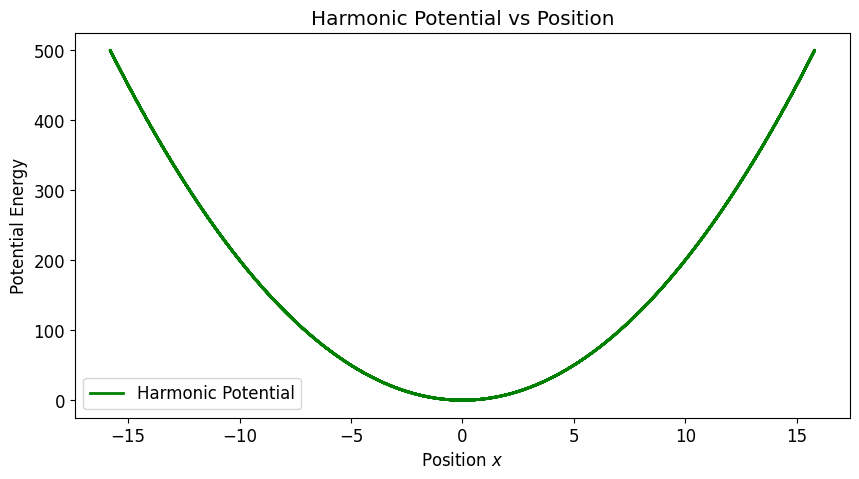

Text(0.5, 1.0, 'Morse Potential vs Position')

Text(0.5, 0, 'Position $x$')

Text(0, 0.5, 'Potential Energy')

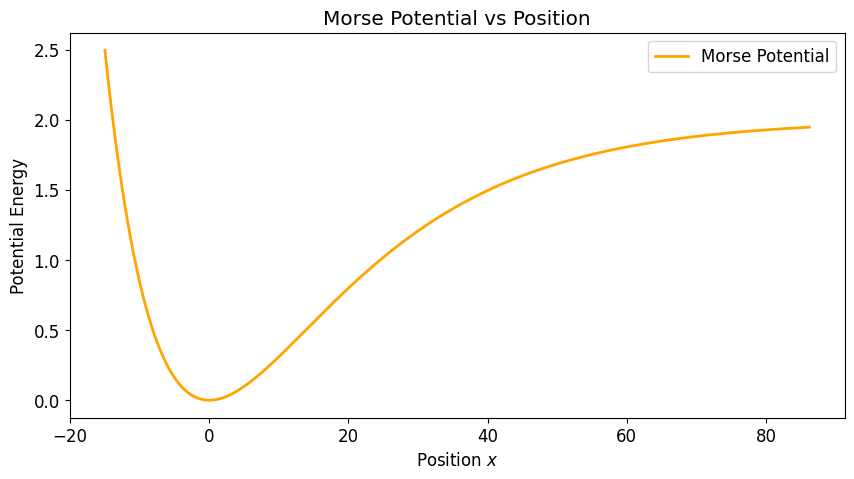

Text(0.5, 1.0, 'Double-well Potential vs Position')

(0.0, 50.0)

Text(0.5, 0, 'Position $x$')

Text(0, 0.5, 'Potential Energy')

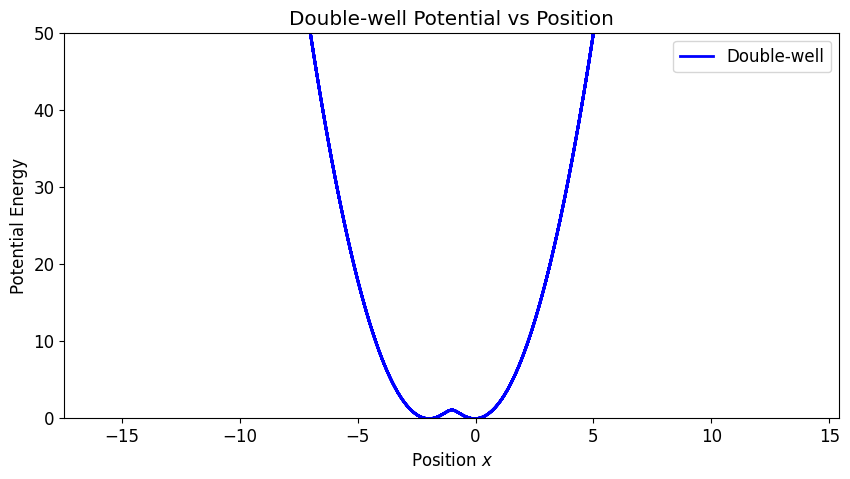

Text(0.5, 1.0, 'Comparison of the 3 Potentials vs Position')

(-15.0, 60.0)

(-1.0, 10.0)

Text(0.5, 0, 'Position $x$')

Text(0, 0.5, 'Potential Energy')

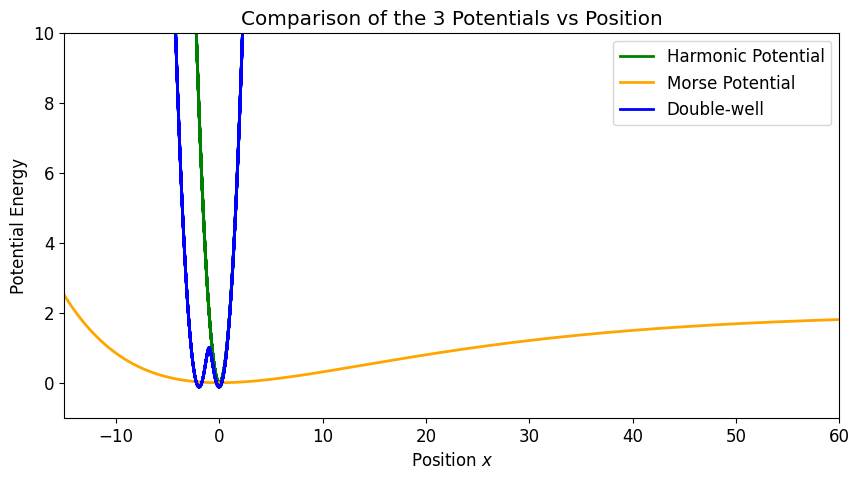

Text(0.5, 1.0, 'Position and velocity vs time in the Harmonic Potential')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Position / Velocity')

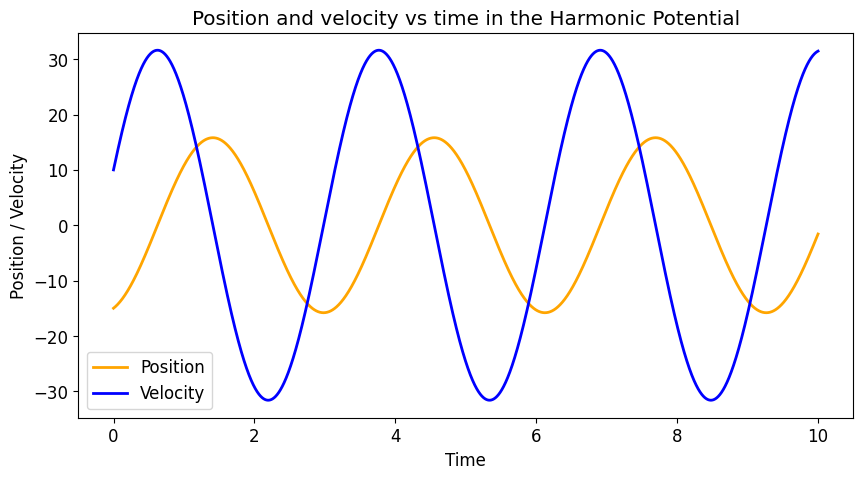

Text(0.5, 1.0, 'Position and velocity vs time in the Morse Potential')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Position / Velocity')

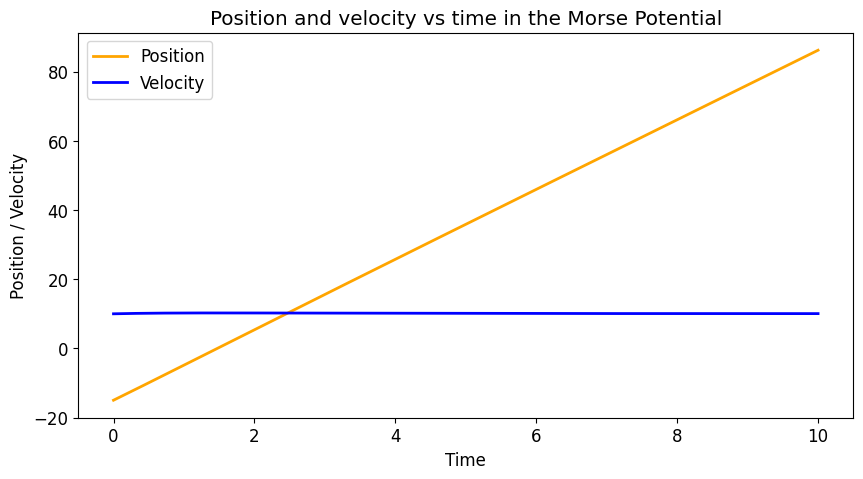

Text(0.5, 1.0, 'Position and velocity vs time in the Double-well Potential')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Position / Velocity')

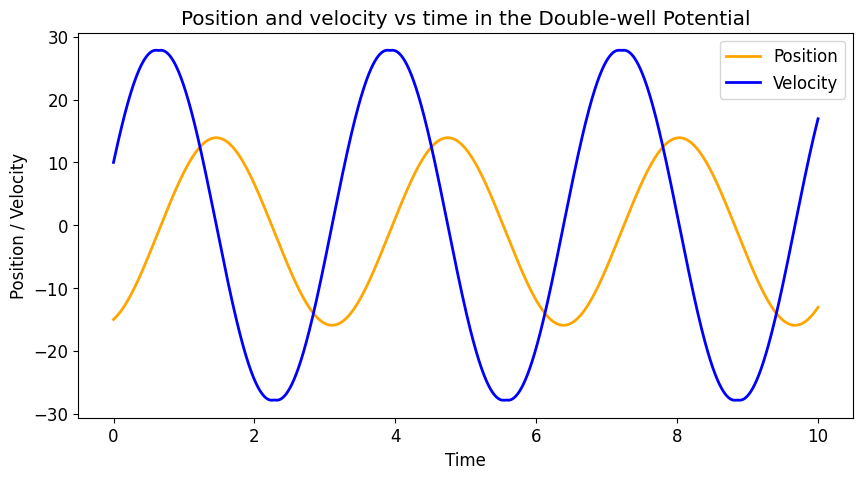

Text(0.5, 1.0, 'Verification of energy conservation')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Percetage of variation in energy')

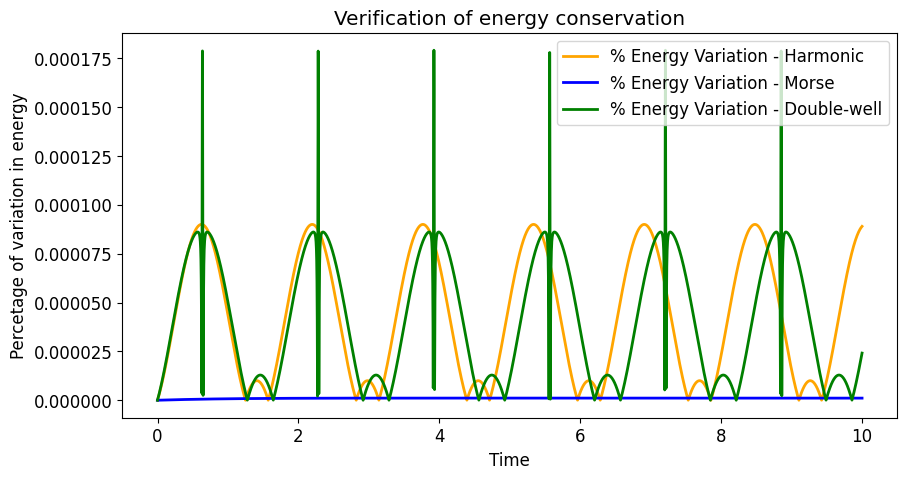

Mean value of the position:
Harmonic Potential:-0.5374015480600578
Morse Potential:35.77929645701741
Double-well Potential:-1.189324206196013


In [18]:
# insert your code here
# insert your code here

#Plotting Potentials as a function of position
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data["Harmonic"]['Position'],data["Harmonic"]['Potential'],linewidth=2,color='green',label="Harmonic Potential")
plt.title("Harmonic Potential vs Position")
plt.xlabel("Position $x$")
plt.ylabel("Potential Energy")
plt.legend()
plt.show()

#Morse
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data["Morse"]['Position'],data["Morse"]['Potential'],linewidth=2,color='orange',label="Morse Potential")
plt.title("Morse Potential vs Position")
plt.xlabel("Position $x$")
plt.ylabel("Potential Energy")
plt.legend()
plt.show()

#MDouble-well
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data["Double-well"]['Position'],data["Double-well"]['Potential'],linewidth=2,color='blue',label="Double-well")
plt.title("Double-well Potential vs Position")
plt.ylim(0,50)
plt.xlabel("Position $x$")
plt.ylabel("Potential Energy")
plt.legend()
plt.show()

#Comparison of the three potentials
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data["Harmonic"]['Position'],data["Harmonic"]['Potential'],linewidth=2,color='green',label="Harmonic Potential")
plt.plot(data["Morse"]['Position'],data["Morse"]['Potential'],linewidth=2,color='orange',label="Morse Potential")
plt.plot(data["Double-well"]['Position'],data["Double-well"]['Potential'],linewidth=2,color='blue',label="Double-well")
plt.title("Comparison of the 3 Potentials vs Position")
plt.xlim(-15,60)                                   #x limit
plt.ylim(-1,10)
plt.xlabel("Position $x$")
plt.ylabel("Potential Energy")
plt.legend()
plt.show()

#Position and velocity vs. Time
#Harmonic
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data["Harmonic"]['Time'],data["Harmonic"]['Position'],linewidth=2,color='orange',label="Position")
plt.plot(data["Harmonic"]['Time'],data["Harmonic"]['Velocity'],linewidth=2,color='blue',label="Velocity")
plt.title("Position and velocity vs time in the Harmonic Potential")
plt.xlabel("Time")
plt.ylabel("Position / Velocity")
plt.legend()
plt.show()

#Morse
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data["Morse"]['Time'],data["Morse"]['Position'],linewidth=2,color='orange',label="Position")
plt.plot(data["Morse"]['Time'],data["Morse"]['Velocity'],linewidth=2,color='blue',label="Velocity")
plt.title("Position and velocity vs time in the Morse Potential")
plt.xlabel("Time")
plt.ylabel("Position / Velocity")
plt.legend()
plt.show()

#Double-Well
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data["Double-well"]['Time'],data["Double-well"]['Position'],linewidth=2,color='orange',label="Position")
plt.plot(data["Double-well"]['Time'],data["Double-well"]['Velocity'],linewidth=2,color='blue',label="Velocity")
plt.title("Position and velocity vs time in the Double-well Potential")
plt.xlabel("Time")
plt.ylabel("Position / Velocity")
plt.legend()
plt.show()


#Plot the variation in total energy (as a percentage) as a function of time
#Energy variation
#for i in range(0,Etot_data):
#    percentage = abs((Etot_data[0]-Etot_data[i]))/Etot_data[0]

def E_var(x,E):                 #Function to calculate the percentage of variation in energy for a value 'x' with respect to the original value E
    E_per = abs(x-E)/(E)*100
    return E_per

#Applying the function to the results of each potential (numpy array). Then, these values will be plot
E_var_h = E_var(data["Harmonic"]['Total Energy'],data["Harmonic"]['Total Energy'][0])
E_var_m = E_var(data["Morse"]['Total Energy'],data["Morse"]['Total Energy'][0])
E_var_d = E_var(data["Double-well"]['Total Energy'],data["Double-well"]['Total Energy'][0])


plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data["Harmonic"]['Time'],E_var_h,linewidth=2,color='orange',label="% Energy Variation - Harmonic")
plt.plot(data["Morse"]['Time'],E_var_m,linewidth=2,color='blue',label="% Energy Variation - Morse")
plt.plot(data["Double-well"]['Time'],E_var_d,linewidth=2,color='green',label="% Energy Variation - Double-well")
#plt.xlim(0,1)                                   #x limit
#plt.ylim(-0.001,0.001)
plt.title("Verification of energy conservation")
plt.xlabel("Time")
plt.ylabel("Percetage of variation in energy")
plt.legend()
plt.show()

#Mean value of the position
print("\033[1m" + f"Mean value of the position:" +"\033[0m")
for name in data:
    mean = np.mean(data[name]['Position'])
    print(f"{name} Potential:{mean}")
    


## OPTIONNAL :Beyond the potential of one dimension - 2D potentials

<div class="rqT" title="Directives">
    
- A two-dimensional potential can simply be created by adding a one-dimensional potential along x and another along y, as well as any coupling function between x and y.
    
 $$ V(x,y)=V_1(x)+V_2(y)+f(x,y) $$
    
where $𝑉_1 (𝑥)$ and $𝑉_2 (𝑦)$ can be one of the previous potential and with, for example, $𝑓(𝑥,𝑦)=𝑥.𝑦$
    
Using a double-well potential for $𝑉_1 (𝑥)$ and $𝑉_2 (𝑦)$ and the coupling function define just before will creat a four-well potential.


- Another way to implement a two-dimensional potential is to use the so-called Muller-Brown potential:
   $$ V(x,y)=\sum_{i=1}^4 A_i.exp[a_i(x-x^0_i)^2+b_i(x-x^0_i)(y-y^0_i)+c_i(y-y^0_i)^2] $$
    
with

A = (−200, −100, −170, 15)
    
a = (−1, −1, −6.5, 0.7) ; b = (0, 0, 11, 0.6) ; c = (−10, −10, −6.5, 0.7)
    
$x^0$ = (1, 0, −0.5, −1) ; $y^0$ = (0, 0.5, 1.5, 1)
     
</div>

<div class="rqT" title="Directives">
    
- For the Velocity-Verlet algorithm, you will need to calculate new positions (new $x$ and new $y$) and speeds (new $v_x$ and new $v_y$) using the formula given at the beginning:

For $x$:
    
\begin{align}    
\mathbf{x(t+\delta t)=x(t)+v_x(t).\delta t-\frac{1}{2M}\frac{\partial V(x(t),y(t))}{\partial x}.\delta t^2} \\    
\end{align}
    
\begin{align}   
\mathbf{v_x(t+\delta t)=v_x(t)-\frac{1}{2M}[\frac{\partial V(x(t),y(t))}{\partial x}+\frac{\partial V(x(t+\delta t),y(t+\delta t))}{\partial x}].\delta t} \\
\end{align}
    
For $y$:
    
\begin{align}    
\mathbf{y(t+\delta t)=y(t)+v_y(t).\delta t-\frac{1}{2M}\frac{\partial V(x(t),y(t))}{\partial y}.\delta t^2} \\    
\end{align}
    
\begin{align}   
\mathbf{v_y(t+\delta t)=v_y(t)-\frac{1}{2M}[\frac{\partial V(x(t),y(t))}{\partial y}+\frac{\partial V(x(t+\delta t),y(t+\delta t))}{\partial y}].\delta t} \\
\end{align}
        
</div>

<div class="exE">

- You need to answer the same questions as for the 1D potential problem
    
    
</div>

In [12]:
# insert your code here

#DEFINING THE POTENTIAL
#First, I will create a potential by adding a one-dimensional potential along x and another along y, as well as any coupling function between x and y.

#Define parameters for potentials:
m = 1       # mass of the particle
xe_1 = 0    # Equilibrium distance for harmonic potentials, x coord.
ye_1 = 0    # Equilibrium distance for harmonic potentials, x coord.

k_1 =  2    # Force constant for harmonic and double-well potentials

x = sp.symbols('x')   #Define x symbol in SymPy
y = sp.symbols('y')   #Define x symbol in SymPy

#1. Harmonic Potential
#Using V(x,y) = V1(x) + V2(y) + f(x,y) with f(x,y) = x*y
#Function to compute the potential
def V_harm_2D(x,y):  
    V_harm_x = k_1*(x-xe_1)**2   #Applying the equation k*(x-x_e)^2 with k_1 and xe_1
    V_harm_y = k_1*(y-ye_1)**2   #Applying the equation k*(x-x_e)^2 with k_1 and xe_1
    V_harm = V_harm_x + V_harm_y + x*y   #Using vVx,y) = V1(x) + V2(y) + f(x,y) with f(x,y) = x*y
    return V_harm

#Function to compute the force from the potential
def force_pot(V):
    der_pot_x = sp.diff(V, x)    #derivative of potential V with respect to x
    der_pot_y = sp.diff(V, y)    #derivative of potential V with respect to y
    return -(der_pot_x + der_pot_y)    

#Displaying the analytic expression of the selected potential and associated forces
print("\033[1m" + f"Harmonic 2D Potential:" +"\033[0m")
V_harm_2D(x,y)
print("\033[1m" + "Associated forces:" +"\033[0m") 
force_pot(V_harm_2D(x,y))


#Now, let's define the Muller-Brown Potential
A = [-200, -100, -170, 15]
a = [-1, -1, -6.5, 0.7]
b = [0, 0, 11, 0.6]
c = [-10, -10, -6.5, 0.7]
x_o = [1, 0, -0.5, -1] 
y_o = [0, 0.5, 1.5, 1]
muller_brown_pot = 0

for i in range(0,len(A)):
    term = A[i] * sp.exp( a[i] *(x-x_o[i])**2 + b[i]*(x-x_o[i])*(y-y_o[i]) + c[i]*(y-y_o[i])**2)
    muller_brown_pot = muller_brown_pot + term

#Displaying the analytic expression of the selected potential and associated forces
print("\033[1m" + f"Muller-Brown Potential:" +"\033[0m")
muller_brown_pot
print("\033[1m" + "Associated forces:" +"\033[0m") 
force_pot(muller_brown_pot)


Harmonic 2D Potential:


2*x**2 + x*y + 2*y**2

Associated forces:


-5*x - 5*y

Muller-Brown Potential:


-100*exp(-x**2 - 10*(y - 0.5)**2) - 200*exp(-10*y**2 - (x - 1)**2) + 15*exp((0.6*x + 0.6)*(y - 1) + 0.7*(x + 1)**2 + 0.7*(y - 1)**2) - 170*exp(-6.5*(x + 0.5)**2 + (11*x + 5.5)*(y - 1.5) - 14.625*(0.666666666666667*y - 1)**2)

Associated forces:


-200*x*exp(-x**2 - 10*(y - 0.5)**2) - 4000*y*exp(-10*y**2 - (x - 1)**2) + 200*(2 - 2*x)*exp(-10*y**2 - (x - 1)**2) + 100*(10.0 - 20*y)*exp(-x**2 - 10*(y - 0.5)**2) + 170*(-13.0*x + 11*y - 23.0)*exp(-6.5*(x + 0.5)**2 + (11*x + 5.5)*(y - 1.5) - 14.625*(0.666666666666667*y - 1)**2) - 15*(0.6*x + 1.4*y - 0.8)*exp((0.6*x + 0.6)*(y - 1) + 0.7*(x + 1)**2 + 0.7*(y - 1)**2) - 15*(1.4*x + 0.6*y + 0.8)*exp((0.6*x + 0.6)*(y - 1) + 0.7*(x + 1)**2 + 0.7*(y - 1)**2) + 170*(11*x - 13.0*y + 25.0)*exp(-6.5*(x + 0.5)**2 + (11*x + 5.5)*(y - 1.5) - 14.625*(0.666666666666667*y - 1)**2)

In [13]:
#APPLYING VERLET'S VELOCITY ALGORITHM WITH THE 2D POTENTIAL

#1. Setting the initial conditions
dt = 0.001 #Step time in seconds
tf = 10 #Number of steps to get 1 s of simulation
M = 1 #Trial mass
t0 = 0 #Initial time
x0 = -15 #Initial x position
y0 = -10 #Initial y position
vx0 = 10 #Initial x velocity
vy0 = 0  #Initial y velocity

#Creating lists to store the initial conditions of each parameter and a dictionary, data, to store all the results. 
data_2 = {}
x_data = [x0]
y_data = [y0]
vx_data = [vx0]
vy_data = [vy0]
t_data = np.arange(t0, tf, dt) #Array that contains initial time, final time, and time step.
potential = V_harm_2D(x,y)

#First with the Harmonic 2D Potential
pot_func = sp.lambdify([x,y], potential, 'numpy')
force_func = sp.lambdify([x,y], force_pot(potential), 'numpy')
ax_data = [force_func(x_data[0],0) / M]
ay_data = [force_func(0,y_data[0]) / M]

#2. Loop to apply the algorithm in a time interval
for t in t_data:                                    #Loop in the range from time 0 to n (defined as 10s), in a step of size dt (defined as 0.1 s)
    _x = x_data[-1] +  vx_data[-1] * dt - 0.5 * ax_data[-1] * dt**2 / (2*M)   #x Position according to Verlet's algorithm in 2D
    _a_x = force_func(_x,0) / M                     #Acceleration in x, calculated from the force, at position x at t+dt. Thus, it's acceleration at t+dt. The arguments (x,y), where y is set to 0 to guarantee we work only with the derivative with respect to x
    _v_x = vx_data[-1] - (ax_data[-1] + _a_x) * dt * 0.5 / (2*M)            #Velocity in time t+dt, according to Verlet's algorithm
    x_data.append(_x)                               #Adding the new x value to the list x_data. In the next iteration, this will be the last element of the list, then it will be used as x0 (since it uses x_data[-1])
    vx_data.append(_v_x)                            #Adding the new Vx value to the list vx_data
    ax_data.append(_a_x)                            #Adding the new ax value to the list ax_data
    #Now same for the y coordinate
    _y = y_data[-1] +  vy_data[-1] * dt - 0.5 * ay_data[-1] * dt**2 / (2*M)   #x Position according to Verlet's algorithm in 2D
    _a_y = force_func(0,_y) / M                     #Acceleration in x, calculated from the force, at position x at t+dt. Thus, it's acceleration at t+dt. The arguments (x,y), where y is set to 0 to guarantee we work only with the derivative with respect to x
    _v_y = vy_data[-1] - (ay_data[-1] + _a_y) * dt * 0.5 / (2*M)            #Velocity in time t+dt, according to Verlet's algorithm
    y_data.append(_y)                               #Adding the new y value to the list y_data. In the next iteration, this will be the last element of the list, then it will be used as x0 (since it uses x_data[-1])
    vy_data.append(_v_y)                            #Adding the new Vy value to the list Vy_data
    ay_data.append(_a_y)                            #Adding the new ay value to the list ay_data

#Delete the extra element in the lists, which is the last one
x_data.pop()
y_data.pop()
vx_data.pop()
vy_data.pop()
Tx_data = (0.5 * M * np.array(vx_data)**2)                    #Kinetic energy calculation in the x direction
Ty_data = (0.5 * M * np.array(vy_data)**2)                    #Kinetic energy calculation in the y direction
pot_data = pot_func(np.array(x_data),np.array(y_data))
Etotx = Tx_data + pot_func(np.array(x_data),0)                #Total energy, defined in the context of Hamiltonian Mechanics. The sum of kinetic and potential energy. 
Etoty = Ty_data + pot_func(0,np.array(y_data))    

#Appending the lists with the results of each parameter to the dictionary "data"
data_2 = {'Time': t_data, 'x Position': x_data, 'y Position': y_data, 'Velocity in x': vx_data, 'Velocity in y': vy_data, 'Potential': pot_data, 'Total Energy in x': Etotx, 'Total Energy in y': Etoty}

   

-31919775.123041116

-36793235.42453999

-50469611.66633736

-58175231.39391843

Text(0.5, 1.0, 'Position and velocity (in x) vs time in the Harmonic 2D Potential')

Text(0.5, 0, 'Time')

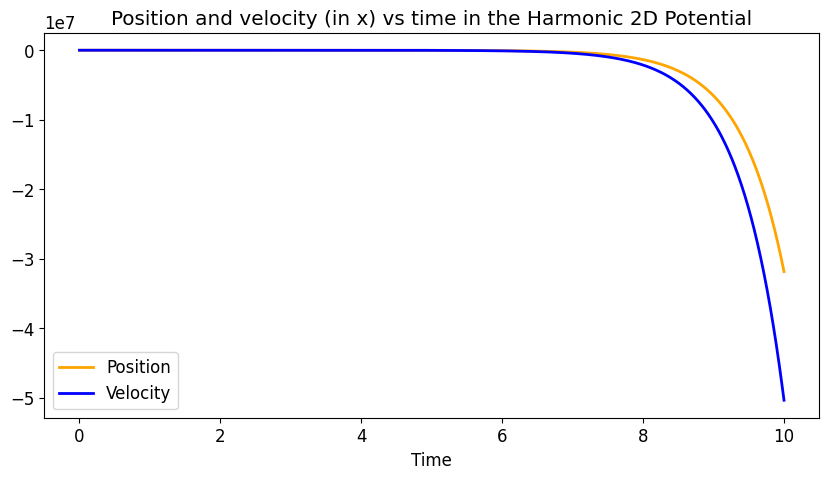

Text(0.5, 1.0, 'Position and velocity (in y) vs time in the Harmonic 2D Potential')

Text(0.5, 0, 'Time')

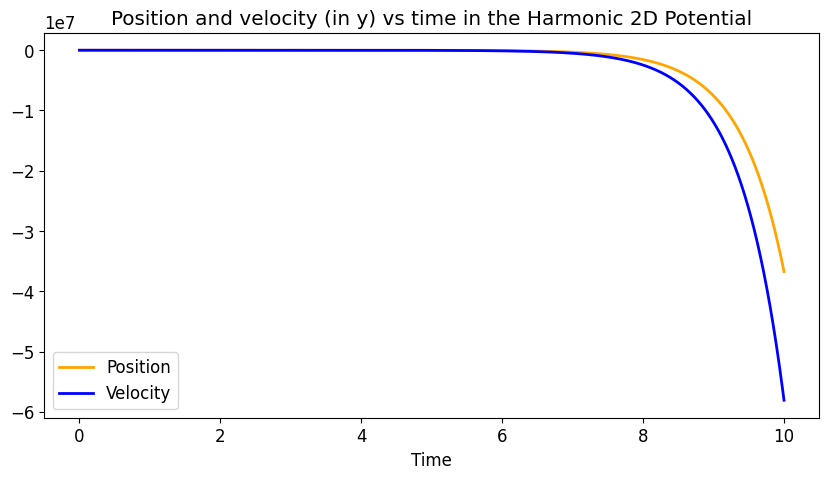

[0.00000000e+00 4.06250352e-04 1.62500547e-03 ... 2.17906081e+15
 2.18596251e+15 2.19288607e+15]


(0.0, 8.0)

Text(0.5, 1.0, 'Verification of energy conservation')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Percetage of variation in energy')

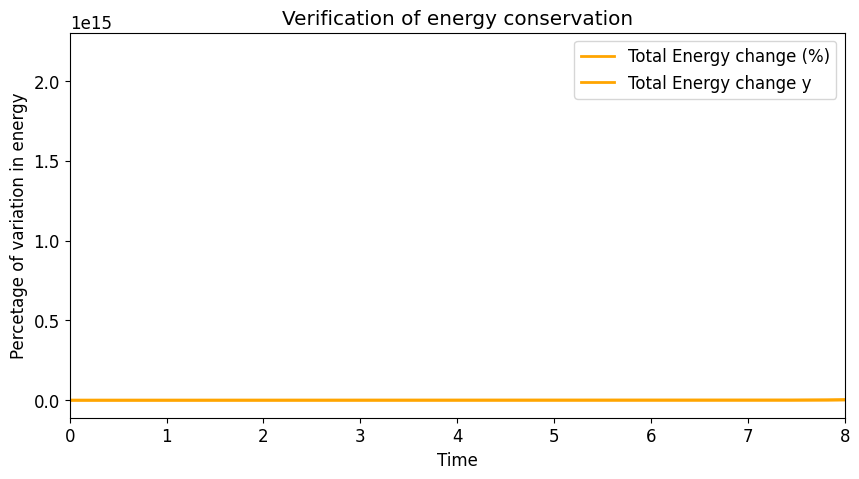

Mean value of the position:
x coordinate: 2D Harmonic Potential:-2017188.8786473416
y coordinate: 2D Harmonic Potential:-2325169.5944855097


In [17]:
#Plotting Potentials as a function of position
# plt.rcParams["figure.figsize"] = (10,5)
# plt.rcParams.update({'font.size': 12})
# #plt.plot(data['Position'],data["Harmonic"]['Potential'],linewidth=2,color='green',label="Harmonic Potential")
# #plt.xlim(0,1)                                   #x limit
# #plt.ylim(-10,10)
# plt.xlabel("x Position")
# plt.legend()
# plt.show()


#Position and velocity vs time
#Harmonic in x
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data_2['Time'],data_2['x Position'],linewidth=2,color='orange',label="Position")
plt.plot(data_2['Time'],data_2['Velocity in x'],linewidth=2,color='blue',label="Velocity")
#plt.xlim(0,1)                                   #x limit
#plt.ylim(-10,10)
plt.title("Position and velocity (in x) vs time in the Harmonic 2D Potential")
plt.xlabel("Time")
plt.legend()
plt.show()

#Harmonic in y
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data_2['Time'],data_2['y Position'],linewidth=2,color='orange',label="Position")
plt.plot(data_2['Time'],data_2['Velocity in y'],linewidth=2,color='blue',label="Velocity")
#plt.xlim(0,1)                                   #x limit
#plt.ylim(-10,10)
plt.title("Position and velocity (in y) vs time in the Harmonic 2D Potential")
plt.xlabel("Time")
plt.legend()
plt.show()

E_var2Dx = E_var(data_2['Total Energy in x'],data_2['Total Energy in x'][0])
E_var2Dy = E_var(data_2['Total Energy in y'],data_2['Total Energy in y'][0])
print(E_var2Dy)

#Plot the variation in total energy (as a percentage) as a function of time
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data_2['Time'],E_var2Dx,linewidth=2,color='orange',label="Total Energy change (%)")
plt.plot(data_2['Time'],E_var2Dy,linewidth=2,color='orange',label="Total Energy change y")
plt.xlim(0,8)                                   #x limit
#plt.ylim(-0.005,0.005)
plt.title("Verification of energy conservation")
plt.xlabel("Time")
plt.ylabel("Percetage of variation in energy")
plt.legend()
plt.show()


#Mean value of the position
print("\033[1m" + f"Mean value of the position:" +"\033[0m")
x_mean = np.mean(data_2['x Position'])
y_mean = np.mean(data_2['y Position'])
print(f"x coordinate: 2D Harmonic Potential:{x_mean}")
print(f"y coordinate: 2D Harmonic Potential:{y_mean}")


In [ ]:
#APPLYING VERLET'S VELOCITY ALGORITHM WITH THE 2D POTENTIAL: Now with the Muller-Brown Potential

#1. Setting the initial conditions
dt = 0.01 #Step time in seconds
tf = 5 #Number of steps to get 1 s of simulation
M = 1 #Trial mass
t0 = 0 #Initial time
x0 = -15 #Initial x position
y0 = 0 #Initial y position
vx0 = 10 #Initial x velocity
vy0 = 0  #Initial y velocity

#Creating lists to store the initial conditions of each parameter and a dictionary, data, to store all the results. 
data_m = {}
x_data = [x0]
y_data = [y0]
vx_data = [vx0]
vy_data = [vy0]
t_data = np.arange(t0, tf, dt) #Array that contains initial time, final time, and time step.

potential = muller_brown_pot
#Now with the Muller-Brown Potential
pot_func = sp.lambdify([x,y], potential, 'numpy')
force_func = sp.lambdify([x,y], force_pot(potential), 'numpy')
ax_data = [force_func(x_data[0],0) / M]
ay_data = [force_func(0,y_data[0]) / M]

#2. Loop to apply the algorithm in a time interval
for t in t_data:                                    #Loop in the range from time 0 to n (defined as 10s), in a step of size dt (defined as 0.1 s)
    _x = x_data[-1] +  vx_data[-1] * dt - 0.5 * ax_data[-1] * dt**2 / (2*M)   #x Position according to Verlet's algorithm in 2D
    _a_x = force_func(_x,0) / M                     #Acceleration in x, calculated from the force, at position x at t+dt. Thus, it's acceleration at t+dt. The arguments (x,y), where y is set to 0 to guarantee we work only with the derivative with respect to x
    _v_x = vx_data[-1] - (ax_data[-1] + _a_x) * dt * 0.5 / (2*M)            #Velocity in time t+dt, according to Verlet's algorithm
    x_data.append(_x)                               #Adding the new x value to the list x_data. In the next iteration, this will be the last element of the list, then it will be used as x0 (since it uses x_data[-1])
    vx_data.append(_v_x)                            #Adding the new Vx value to the list vx_data
    ax_data.append(_a_x)                            #Adding the new ax value to the list ax_data
    #Now same for the y coordinate
    _y = y_data[-1] +  vy_data[-1] * dt - 0.5 * ay_data[-1] * dt**2 / (2*M)   #x Position according to Verlet's algorithm in 2D
    _a_y = force_func(0,_y) / M                     #Acceleration in x, calculated from the force, at position x at t+dt. Thus, it's acceleration at t+dt. The arguments (x,y), where y is set to 0 to guarantee we work only with the derivative with respect to x
    _v_y = vy_data[-1] - (ay_data[-1] + _a_y) * dt * 0.5 / (2*M)            #Velocity in time t+dt, according to Verlet's algorithm
    y_data.append(_y)                               #Adding the new y value to the list y_data. In the next iteration, this will be the last element of the list, then it will be used as x0 (since it uses x_data[-1])
    vy_data.append(_v_y)                            #Adding the new Vy value to the list Vy_data
    ay_data.append(_a_y)                            #Adding the new ay value to the list ay_data

#Delete the extra element in the lists, which is the last one
x_data.pop()
y_data.pop()
vx_data.pop()
vy_data.pop()
Tx_data = (0.5 * M * np.array(vx_data)**2)                    #Kinetic energy calculation in the x direction
Ty_data = (0.5 * M * np.array(vy_data)**2)                    #Kinetic energy calculation in the y direction
pot_data = pot_func(np.array(x_data),np.array(y_data))
Etotx = Tx_data + pot_func(np.array(x_data),0)                #Total energy, defined in the context of Hamiltonian Mechanics. The sum of kinetic and potential energy. 
Etoty = Ty_data + pot_func(0,np.array(y_data))    

#Appending the lists with the results of each parameter to the dictionary "data"
data_m = {'Time': t_data, 'x Position': x_data, 'y Position': y_data, 'Velocity in x': vx_data, 'Velocity in y': vy_data, 'Potential': pot_data, 'Total Energy in x': Etotx, 'Total Energy in y': Etoty}


In [ ]:
#Plotting Potentials as a function of position
# plt.rcParams["figure.figsize"] = (10,5)
# plt.rcParams.update({'font.size': 12})
# #plt.plot(data['Position'],data["Harmonic"]['Potential'],linewidth=2,color='green',label="Harmonic Potential")
# #plt.xlim(0,1)                                   #x limit
# #plt.ylim(-10,10)
# plt.xlabel("x Position")
# plt.legend()
# plt.show()


#Position and velocity vs time
#Harmonic in x
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data_m['Time'],data_m['x Position'],linewidth=2,color='orange',label="Position")
plt.plot(data_m['Time'],data_m['Velocity in x'],linewidth=2,color='blue',label="Velocity")
#plt.xlim(0,1)                                   #x limit
#plt.ylim(-10,10)
plt.title("Position and velocity (in x) vs time in the Harmonic 2D Potential")
plt.xlabel("Time")
plt.legend()
plt.show()

#Harmonic in y
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data_m['Time'],data_m['y Position'],linewidth=2,color='orange',label="Position")
plt.plot(data_m['Time'],data_m['Velocity in y'],linewidth=2,color='blue',label="Velocity")
#plt.xlim(0,1)                                   #x limit
#plt.ylim(-10,10)
plt.title("Position and velocity (in y) vs time in the Harmonic 2D Potential")
plt.xlabel("Time")
plt.legend()
plt.show()

#Plot the variation in total energy (as a percentage) as a function of time
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(data_m['Time'],data_m['Total Energy in x'],linewidth=2,color='orange',label="Total Energy")
#plt.xlim(0,1)                                   #x limit
#plt.ylim(0,50e13)
plt.title("Variation in total Energy Check")
plt.xlabel("Time")
plt.legend()
plt.show()



#Mean value of the position
print("\033[1m" + f"Mean value of the position:" +"\033[0m")
x_mean = np.mean(data['x Position'])
y_mean = np.mean(data['y Position'])
print(f"x coordinate: 2D Harmonic Potential:{x_mean}")
print(f"y coordinate: 2D Harmonic Potential:{y_mean}")


# End

In [ ]:
vID.end(cwd0)